In [39]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [56]:
df_hospital = pd.read_csv('../data/hospital_visits.csv')
df_hospital['Week'] = df_hospital.Week.map(str) + "-" + df_hospital.Year.map(str)
df_hospital = df_hospital[['Total ILI']]
list_data = list(df_hospital['Total ILI'])

In [41]:
list_data = list(df_hospital['Total ILI'])

In [45]:
model = SARIMAX(list_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit = model.fit(disp=False)

In [58]:
# make prediction
future = 52
# predictions = model_fit.predict(len(list_data), len(list_data) + future)
predictions = model_fit.forecast(future)
print(predictions)
future_weeks = list(range(len(list_data) - 1, len(list_data) + future))
# future_weeks

[34867.40318467 34553.85774319 38844.38199064 39483.68379736
 44690.67894977 52382.97652381 56062.9363244  56239.82616667
 59690.82107963 64041.35410701 73053.92516054 81082.68977204
 87985.12690884 82366.49902819 69881.23312296 57857.73579318
 53133.71217687 50306.59297816 46725.93112414 42024.80731556
 38789.13075715 35282.776669   32393.87899591 31156.70620548
 29718.40601253 28173.55022195 27594.81804287 26909.44236392
 25953.53408884 24996.03512359 23837.66940947 23152.85764134
 22625.32645942 21776.4630689  21746.15167734 21257.85689829
 21012.36275998 21091.8356966  21284.20772706 21987.08215427
 22914.57369647 23991.72326936 25073.67939423 26019.42212509
 26915.85833788 27270.42408812 33294.08609636 34080.32643663
 35527.75554356 37397.51039522 38690.41827807 40645.93937469]


In [59]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions')

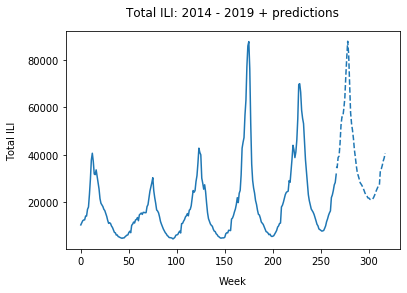

In [60]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--', c='#1f77b4')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions", pad=15)

In [57]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  267
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1993.387
Date:                            Mon, 09 Dec 2019   AIC                           3996.775
Time:                                    01:45:14   BIC                           4013.605
Sample:                                         0   HQIC                          4003.576
                                            - 267                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5280      0.133      3.980      0.000       0.268       0.788
ma.L1          0.1169      0.136      0.863      0.388      -0.149       0.383
ar.S.L52      -0.3888      0.197     -1.973      0.048      -0.775      -0.003
ma.S.L52      -0.2529      0.238     -1.065      0.287      -0.719       0.213
sigma2      9.454e+06   7.62e+05     12.414      0.000    7.96e+06    1.09e+07
===================================================================================
Ljung-Box (Q):                       38.49   Jarque-Bera (JB):               871.09
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -1.13
Prob(H) (two-sided):                  0.92   Kurtosis:                        12.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""